# Episode 20. Time Series: Introduction

## Import Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

## Example of Time Series Data - Monthly Retail Sales

In [ ]:
# Original Data Source: https://fred.stlouisfed.org/series/RSXFSN
from google.colab import files
uploaded = files.upload()

Saving RSXFSN.csv to RSXFSN (6).csv


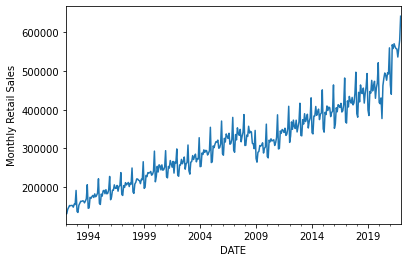

In [ ]:
# load data as pandas Series
series = pd.read_csv('RSXFSN.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# plot time series
plt.ylabel('Monthly Retail Sales')
series.plot()
plt.show()

## Sequence Data

In [ ]:
data_trend = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
df_trend = pd.DataFrame(data_trend, columns = ['trend'])
df_trend

In [ ]:
data_trend2 = np.array([[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],[20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]]).transpose()
df_trend2 = pd.DataFrame(data_trend2, columns = ['trend1','trend2'])
df_trend2

## Method 1. Use Single Sequence

In [ ]:
# construct time series from a single sequence, x
def get_timeseries(x, n_steps=1):
    x_ts, y_ts = [], []
    for ii in range(len(x) - n_steps):
        v = x.iloc[ii:(ii + n_steps)].values
        x_ts.append(v)
        w = x.iloc[ii + n_steps].values
        y_ts.append(w)
    return np.array(x_ts), np.array(y_ts)

### x------------> y
### 1, 2, 3----> 4
### 2, 3, 4----> 5
### 4, 5, 6----> 6
### [skip]
### 9,10,11-----> 12


In [ ]:
n_steps = 3

# convert to a time series dimension: [samples, n_steps, n_features]
xx,yy = get_timeseries(df_trend, n_steps)
print(xx.shape, yy.shape)

(17, 3, 1) (17, 1)


## Method 2. Use Multiple Sequences

In [ ]:
# construct time series from multiple sequences, x, and target sequence, y
def get_timeseries2(x, y, n_steps=1):
    x_ts, y_ts = [], []
    for ii in range(len(x) - n_steps):
        v = x.iloc[ii:(ii + n_steps)].values
        x_ts.append(v)
        w = y.iloc[ii + n_steps]
        y_ts.append(w)
    return np.array(x_ts), np.array(y_ts)

In [ ]:
n_steps = 3

# convert to a time series dimension: [samples, n_steps, n_features]
xx1,yy1 = get_timeseries2(df_trend, df_trend.trend, n_steps)
print(xx1.shape, yy1.shape)

(17, 3, 1) (17,)


In [ ]:
n_steps = 3

# convert to a time series dimension: [samples, n_steps, n_features]
xx2,yy2 = get_timeseries2(df_trend2, df_trend2.trend1, n_steps)
print(xx2.shape, yy2.shape)

(17, 3, 2) (17,)


In [ ]:
yy2

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])